In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号 

In [2]:
df = pd.read_excel('D:/2018 广东金融学院数学建模第一次模拟(1)/2018 广东金融学院数学建模第一次模拟/附件1.xls')
df.head()

df = df.drop(6329)
df['y'] = df['y'].astype('float')
X = df.loc[:,['x1','x6']]
y = df.loc[:,'y']

In [3]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
X_standard

array([[ 0.2758816 , -0.93448911],
       [ 0.06160444,  1.25440119],
       [-1.45866856,  1.25440119],
       ...,
       [-0.10418665, -0.93448911],
       [ 1.11578551, -0.93448911],
       [-1.2279687 ,  1.25440119]])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [6]:
knn = KNN()

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
knn.score(X_test, y_test)

0.7435249526216046

In [9]:
pre = knn.predict(X_test)
print(sum(pre == 0))
#y_test[pre==0]

104


In [10]:
print(sum(pre == 1))
#y_test[pre==1]

1479


In [11]:
# 读数据并保留x1,x6并且归一化处理
df = pd.read_excel('D:/2018 广东金融学院数学建模第一次模拟(1)/2018 广东金融学院数学建模第一次模拟/附件2.xlsx')

X2 = df[['x1','x6']]

# 归一化
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X2)
X2_standard = standardScaler.transform(X2)
X2_standard

array([[ 0.45367371, -0.82375447],
       [-0.03627327, -0.82375447],
       [-0.15304396,  0.82375447],
       [ 0.63413751, -0.82375447],
       [ 0.25687834,  0.82375447],
       [ 0.67496642,  1.64750894],
       [ 0.43325925,  1.64750894],
       [-1.3403488 , -0.82375447],
       [-2.08098531,  0.        ],
       [ 1.04569297, -0.82375447],
       [ 0.77050608, -0.82375447],
       [ 0.99588169, -0.82375447],
       [ 0.25687834,  1.64750894],
       [-1.58695544, -0.82375447],
       [-0.40128376, -0.82375447],
       [-0.87571575,  0.        ],
       [-1.50693077,  1.64750894],
       [ 1.08162241,  0.        ],
       [ 1.37804033, -0.82375447]])

In [12]:
knn.predict(X2_standard)

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [13]:
param_grid = [
    {
        'weights' : ['uniform'],
        'n_neighbors':[i for i in range(1, 11)]
    },
    {
        'weights':['distance'],
        'n_neighbors' : [i for i in range(1,11)],
        'p' : [i for i in range(1, 6)]
    }
]

In [14]:
knn_clf = KNN()

In [15]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1)
grid_search.fit(X_standard,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [17]:
grid_search.best_score_

0.7704218675936166

In [18]:
grid_search.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [19]:
knn_clf = grid_search.best_estimator_

In [20]:
knn_clf.score(X_standard,y)

0.7830620951177121

In [21]:
knn_clf.predict(X2_standard)

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [22]:
y_pre = knn_clf.predict(X2_standard)

In [23]:
X2_standard

array([[ 0.45367371, -0.82375447],
       [-0.03627327, -0.82375447],
       [-0.15304396,  0.82375447],
       [ 0.63413751, -0.82375447],
       [ 0.25687834,  0.82375447],
       [ 0.67496642,  1.64750894],
       [ 0.43325925,  1.64750894],
       [-1.3403488 , -0.82375447],
       [-2.08098531,  0.        ],
       [ 1.04569297, -0.82375447],
       [ 0.77050608, -0.82375447],
       [ 0.99588169, -0.82375447],
       [ 0.25687834,  1.64750894],
       [-1.58695544, -0.82375447],
       [-0.40128376, -0.82375447],
       [-0.87571575,  0.        ],
       [-1.50693077,  1.64750894],
       [ 1.08162241,  0.        ],
       [ 1.37804033, -0.82375447]])

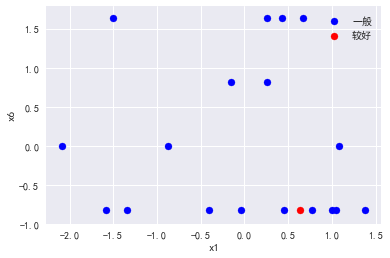

In [24]:
plt.scatter(X2_standard[y_pre==1][:,0], X2_standard[y_pre==1][:,1], color='blue', label='一般')
plt.scatter(X2_standard[y_pre==0][:,0], X2_standard[y_pre==0][:,1], color='red', label='较好')
plt.xlabel('x1')
plt.ylabel('x6')
plt.legend()
plt.show()

In [106]:

def find(x):
    i = 0
    min_x = x[0][0]
    while(i<100):
        i+=1
        x[0][0] -= 1
        x_ss = standardScaler.transform(x)
        y = knn_clf.predict(x_ss)
        if(y==0):
            return x[0][0]
    return None

In [107]:
np.array([X2.loc[0,:]])[0][1]

1.0

In [108]:
for i in range(0,19):
    x = np.array([X2.loc[i,:]])
    print('原来是数值为:'+'x1: '+ str(x[0][0]) + '  x6: ' + str(x[0][1]))
    print('第' + str(i+1) + '行: ')
    yuan_x = x[0][0]
    yuan_x6 = x[0][1]
    i_min = 999999999
    x1_now = x[0][0]
    x6_now = x[0][1]
    for j in range(1,5):
        x[0][1] = float(j)
        x[0][0] = yuan_x
        print('当x6为' + str(j) + '时: ')   
        find_x1 = find(x)
        print('x1最小为: ' + str(find_x1))
        if(find_x1 != None):
            min_pri = (yuan_x - find_x1)*15 + (abs(yuan_x6-j))*30
            print('此时修改x1和x6两个指标的成本为: '+ str(min_pri))
            if min_pri < i_min:
                i_min = min_pri
                x1_now = find_x1
                x6_now = j
    print('第' + str(i+1) + '行调整的最低成本为:'+ str(i_min) + ' 调整的x1值为:'+str(x1_now)+ ' 调整的x6值为:'+str(x6_now))

原来是数值为:x1: 67.9  x6: 1.0
第1行: 
当x6为1时: 
x1最小为: 62.900000000000006
此时修改x1和x6两个指标的成本为: 75.0
当x6为2时: 
x1最小为: 50.900000000000006
此时修改x1和x6两个指标的成本为: 285.0
当x6为3时: 
x1最小为: None
当x6为4时: 
x1最小为: None
第1行调整的最低成本为:75.0 调整的x1值为:62.900000000000006 调整的x6值为:1
原来是数值为:x1: 61.9  x6: 1.0
第2行: 
当x6为1时: 
x1最小为: 58.9
此时修改x1和x6两个指标的成本为: 45.0
当x6为2时: 
x1最小为: 50.9
此时修改x1和x6两个指标的成本为: 195.0
当x6为3时: 
x1最小为: None
当x6为4时: 
x1最小为: None
第2行调整的最低成本为:45.0 调整的x1值为:58.9 调整的x6值为:1
原来是数值为:x1: 60.47  x6: 3.0
第3行: 
当x6为1时: 
x1最小为: 46.47
此时修改x1和x6两个指标的成本为: 270.0
当x6为2时: 
x1最小为: 50.47
此时修改x1和x6两个指标的成本为: 180.0
当x6为3时: 
x1最小为: None
当x6为4时: 
x1最小为: 57.47
此时修改x1和x6两个指标的成本为: 75.0
第3行调整的最低成本为:75.0 调整的x1值为:57.47 调整的x6值为:4
原来是数值为:x1: 70.11  x6: 1.0
第4行: 
当x6为1时: 
x1最小为: 61.11
此时修改x1和x6两个指标的成本为: 135.0
当x6为2时: 
x1最小为: 51.11
此时修改x1和x6两个指标的成本为: 315.0
当x6为3时: 
x1最小为: None
当x6为4时: 
x1最小为: None
第4行调整的最低成本为:135.0 调整的x1值为:61.11 调整的x6值为:1
原来是数值为:x1: 65.49  x6: 3.0
第5行: 
当x6为1时: 
x1最小为: 46.489999999999995
此时修改x1和x6两个指标的成本为: 345.0
当x6为2时: 
x1最小为